In [1]:
import bento
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
adata = bento.datasets.load_dataset("seqfish_processed")

  0%|          | 0.00/321M [00:00<?, ?B/s]

In [3]:
pattern_df = []
for p in bento._constants.PATTERN_NAMES:
    pdf = adata.to_df(p).reset_index().melt(id_vars='cell').groupby("gene").sum()
    pdf['pattern'] = p
    pattern_df.append(pdf)

pattern_df = pd.concat(pattern_df)

In [4]:
pattern_df

,value,pattern
gene,,
5830417i10rik,16.0,cell_edge
Aaas,22.0,cell_edge
Aacs,24.0,cell_edge
Aagab,8.0,cell_edge
Aamp,43.0,cell_edge
...,...,...
Zswim4,9.0,nuclear_edge
Zswim8,3.0,nuclear_edge
Zwilch,3.0,nuclear_edge


In [5]:
top_genes = pattern_df.groupby('pattern').apply(
    lambda col: pd.Series(col.sort_values('value', ascending=False).head(3).index.tolist())
).T
top_genes

pattern,cell_edge,cytoplasmic,none,nuclear,nuclear_edge
0,Cyb5r3,Hnrnpf,Rbpj,Vasn,Col6a2
1,Sh3pxd2a,Eif4g1,Csnk2a1,Slc38a2,Serpinf1
2,Palld,Cav1,Sf1,Col1a1,Pdia3


In [9]:
adata.uns["points"]["top"] = None

for p in bento._constants.PATTERN_NAMES:
    is_top = adata.uns["points"]["gene"].isin(top_genes[p])
    adata.uns["points"]["top"][is_top] = p

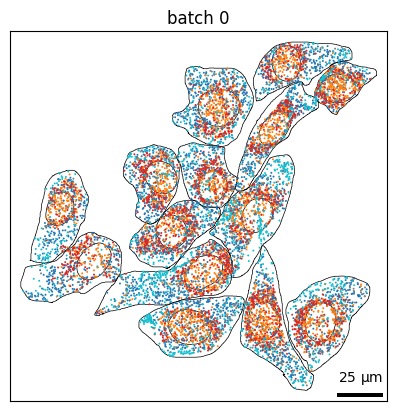

In [10]:
bento.pl.points(
    adata[:, top_genes.values.flatten()],
    hue="top",
    palette=dict(zip(bento._constants.PATTERN_NAMES, bento._constants.PATTERN_COLORS)),
    legend=False,
)